In [106]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
%matplotlib inline

In [107]:
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)

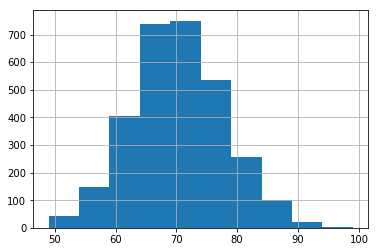

In [108]:
pd.Series(long_breaks).hist()

In [109]:
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)

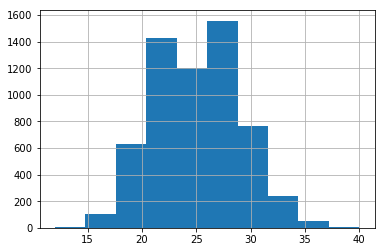

In [110]:
pd.Series(short_breaks).hist()

In [111]:
breaks = np.concatenate((long_breaks, short_breaks))

In [112]:
long_break_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)
short_break_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)
engineering_breaks = np.concatenate((long_break_in_engineering,\
                                     short_break_in_engineering))

In [113]:
print breaks.mean()
# 39.99

39.9091111111


In [114]:
sample_breaks = np.random.choice(a = breaks, size=100)
# taking a sample of 100 employees
sample_breaks

array([24, 20, 67, 20, 68, 30, 29, 25, 25, 26, 28, 21, 16, 24, 24, 28, 65,
       24, 33, 56, 76, 31, 30, 22, 28, 26, 20, 29, 68, 21, 25, 28, 85, 25,
       31, 19, 63, 36, 31, 23, 26, 26, 72, 25, 21, 25, 25, 25, 85, 27, 61,
       25, 28, 60, 23, 77, 59, 21, 28, 23, 25, 21, 33, 25, 22, 26, 18, 83,
       19, 66, 28, 73, 19, 65, 21, 26, 23, 67, 24, 70, 25, 26, 62, 64, 19,
       75, 26, 26, 72, 18, 23, 27, 23, 65, 31, 27, 63, 25, 27, 28])

In [115]:
breaks.mean() - sample_breaks.mean()
# difference between means is 4.09 minutes, not 


3.5291111111111064

In [116]:
import random
employee_races=(["white"]*2000)+(["black"]*1000)+(["hispanic"]*1000)\
+(["asian"]*3000)+(["other"]*3000)

In [117]:
demo_sample = random.sample(employee_races, 1000)
for race in set(demo_sample):
    print(race + " proportion estimate:")
    print(demo_sample.count(race)/1000.)


hispanic proportion estimate:
0.104
white proportion estimate:
0.204
other proportion estimate:
0.286
black proportion estimate:
0.099
asian proportion estimate:
0.307


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6F7828>]], dtype=object)

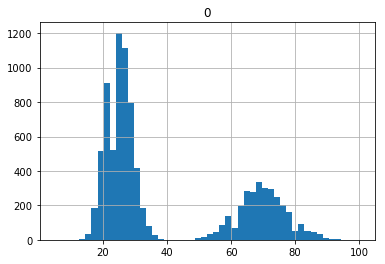

In [118]:
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AA455C0>]], dtype=object)

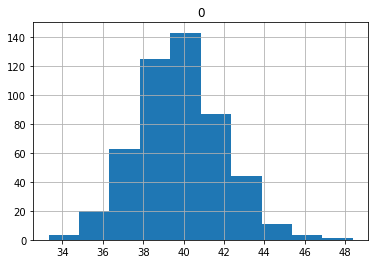

In [119]:
point_estimates = []
for x in range(500):         				# Generate 500 samples
    sample = np.random.choice(a= breaks, size=100) 
    #take a sample of 100 points
    point_estimates.append( sample.mean() )
    # add the sample mean to our list of point estimates
    
pd.DataFrame(point_estimates).hist()

In [120]:
breaks.mean() - np.array(point_estimates).mean()
# 0.047 minutes difference

0.11247111111111252

In [121]:
import math
sample_size = 100
# the size of the sample we wish to tabke

sample = np.random.choice(a= breaks, size = sample_size)
# a sample of sample_size taken from the 9000 breaks population from before

sample_mean = sample.mean()
# the sample mean of lengths sample

sample_stdev = sample.std()    
# sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  
# population Standard deviation estimate

stats.t.interval(alpha = 0.95,              		# Confidence level
                 df= sample_size - 1,       	# Degrees of freedom
                 loc = sample_mean,          # Sample mean
                 scale = sigma)               # Standard deviation estimate
# (36.36, 45.44)


(33.793180792346263, 42.066819207653737)

In [128]:
# function to make confidence interval
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice(a= breaks, size = sample_size)
    sample_mean = sample.mean()
    # sample mean

    sample_stdev = sample.std()    
    # sample standard deviation

    sigma = sample_stdev/math.sqrt(sample_size)  
    # population Standard deviation estimate

    return stats.t.interval(alpha = 0.95, df= sample_size - 1, loc = sample_mean, scale = sigma)


In [129]:
times_in_interval = 0.
for i in range(10000):
    interval = makeConfidenceInterval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
    # if 39.99 falls in the interval
        times_in_interval += 1

print times_in_interval / 10000


0.9471


In [130]:
for confidence in (0.5, 0.8, 0.85, 0.9, 0.95, 0.99):
	confidence_interval = stats.t.interval(alpha = confidence, df = sample_size -1, loc = sample_mean, scale = sigma)
	length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2)
	# the length of the confidence interval
	print "confidence {0} has a interval of size {1}".format(confidence, length_of_interval)


confidence 0.5 has a interval of size 2.82
confidence 0.8 has a interval of size 5.38
confidence 0.85 has a interval of size 6.05
confidence 0.9 has a interval of size 6.92
confidence 0.95 has a interval of size 8.27
confidence 0.99 has a interval of size 10.95


In [122]:
print engineering_breaks.mean()
#34.825

35.2325


In [123]:
t_statistic, p_value = stats.ttest_1samp(a= engineering_breaks, popmean= breaks.mean())

In [124]:
t_statistic

-5.0441437866266652

In [125]:
float(p_value)

6.930569702547211e-07

In [126]:
observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]
chi_squared, p_value = stats.chisquare(f_obs= observed, f_exp= expected)

chi_squared, p_value
# (30.1817679275599, 1.26374310311106e-06)


(30.1817679275599, 1.26374310311106e-06)

In [127]:
observed = np.array([[134, 54],[110, 48]])
# built a 2X2 matrix as seen in the table above

chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed
= observed)

chi_squared, p_value
# (0.04762692369491045, 0.82724528704422262)


(0.04762692369491045, 0.82724528704422262)